In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Load the datasets
# Update with the correct file path
deliveries_df = pd.read_csv('d:/CricketMatchPrediction/dataset/deliveries.csv')
matches_df = pd.read_csv('d:/CricketMatchPrediction/dataset/matches.csv')

# Display the first few rows of both datasets
print("Deliveries Data:")
print(deliveries_df.head())

print("\nMatches Data:")
print(matches_df.head())


Deliveries Data:
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_

In [4]:
# Check for missing values in Deliveries and Matches dataset
print("\nMissing Values in Deliveries Dataset:")
print(deliveries_df.isnull().sum())


Missing Values in Deliveries Dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64


In [5]:

print("\nMissing Values in Matches Dataset:")
print(matches_df.isnull().sum())


Missing Values in Matches Dataset:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [7]:
deliveries_df.fillna({
    'player_dismissed': 'None',
    'dismissal_kind': 'None',
    'fielder': 'None'
}, inplace=True)


FILLING VALUES FOR MATCHES DF

In [11]:
# Fill 'city' based on 'venue' mode (smart fill)
venue_city_map = matches_df.groupby('venue')['city'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
matches_df['city'] = matches_df.apply(
    lambda row: venue_city_map[row['venue']] if pd.isnull(row['city']) else row['city'], axis=1
)

matches_df['city'] = matches_df['city'].fillna(matches_df['city'].mode()[0])
matches_df['winner'] = matches_df['winner'].fillna('No Result')
matches_df['player_of_match'] = matches_df['player_of_match'].fillna('No Award')
matches_df['umpire1'] = matches_df['umpire1'].fillna('Unavailable')
matches_df['umpire2'] = matches_df['umpire2'].fillna('Unavailable')
matches_df['umpire3'] = matches_df['umpire3'].fillna('Unavailable')


# Final check
print("\n✅ Missing Values in Matches Dataset (After Filling):\n", matches_df.isnull().sum())



✅ Missing Values in Matches Dataset (After Filling):
 id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


VISUALIZATION PART

In [13]:

# Load original datasets (adjusting the path)
matches_df_original = pd.read_csv('D:/CricketMatchPrediction/Dataset/matches.csv')
deliveries_df_original = pd.read_csv('D:/CricketMatchPrediction/Dataset/deliveries.csv')

# Display the first few rows to verify
print("Original Matches Dataset:")
print(matches_df_original.head())
print("\nOriginal Deliveries Dataset:")
print(deliveries_df_original.head())

# Check the missing values in the original dataset
print("\nMissing Values in Original Matches Dataset:")
print(matches_df_original.isnull().sum())

print("\nMissing Values in Original Deliveries Dataset:")
print(deliveries_df_original.isnull().sum())


Original Matches Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        

In [14]:
# Check missing values in the cleaned datasets (assuming `matches_df` and `deliveries_df` are cleaned)
print("Missing Values in Cleaned Matches Dataset:")
print(matches_df.isnull().sum())

print("\nMissing Values in Cleaned Deliveries Dataset:")
print(deliveries_df.isnull().sum())

# Compare with the original
print("\nMissing Values in Original Matches Dataset:")
print(matches_df_original.isnull().sum())

print("\nMissing Values in Original Deliveries Dataset:")
print(deliveries_df_original.isnull().sum())


Missing Values in Cleaned Matches Dataset:
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

Missing Values in Cleaned Deliveries Dataset:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

Missing Values in Original Matches Dataset:

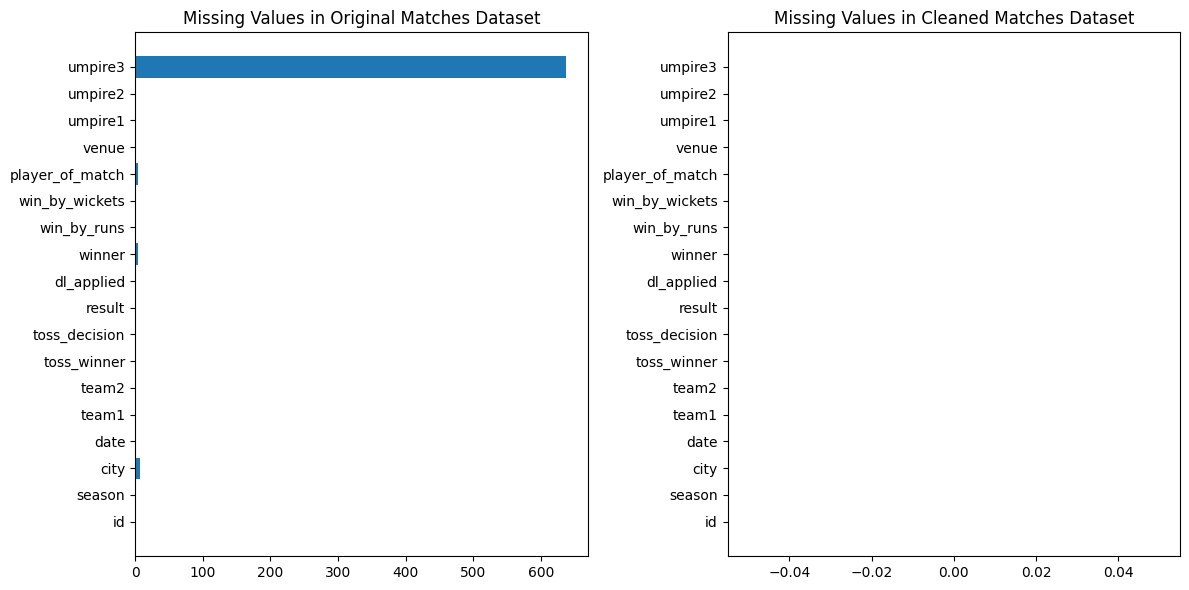

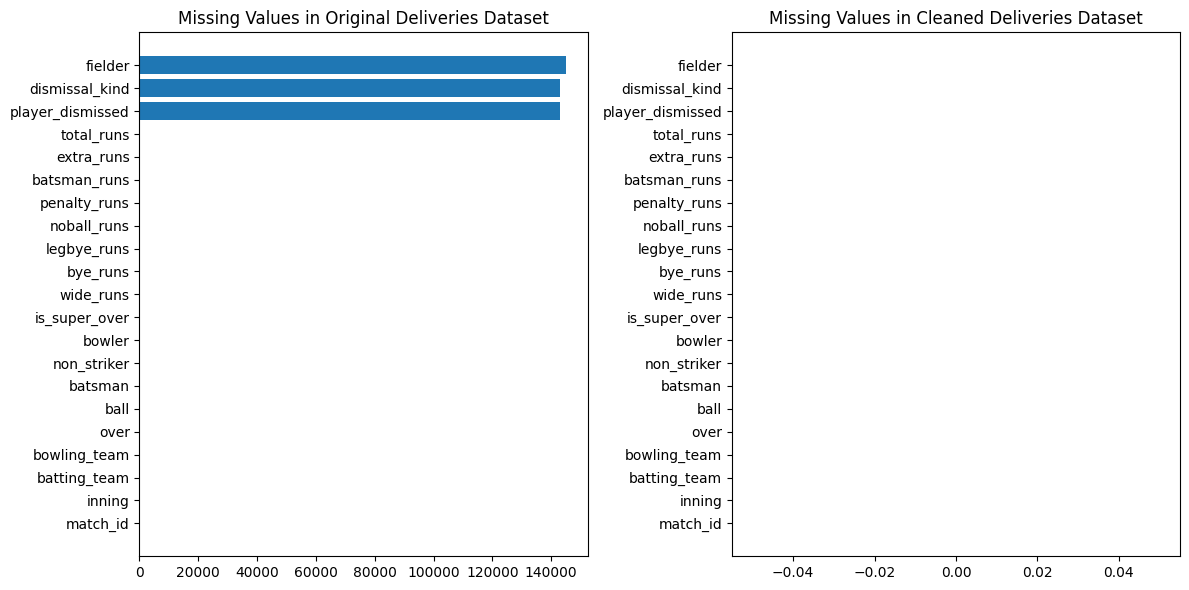

In [15]:
# Visualizing the missing values comparison for Matches dataset
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot missing values for Original Matches dataset
ax[0].barh(matches_df_original.columns, matches_df_original.isnull().sum())
ax[0].set_title('Missing Values in Original Matches Dataset')

# Plot missing values for Cleaned Matches dataset
ax[1].barh(matches_df.columns, matches_df.isnull().sum())
ax[1].set_title('Missing Values in Cleaned Matches Dataset')

plt.tight_layout()
plt.show()

# Visualizing the missing values comparison for Deliveries dataset
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot missing values for Original Deliveries dataset
ax[0].barh(deliveries_df_original.columns, deliveries_df_original.isnull().sum())
ax[0].set_title('Missing Values in Original Deliveries Dataset')

# Plot missing values for Cleaned Deliveries dataset
ax[1].barh(deliveries_df.columns, deliveries_df.isnull().sum())
ax[1].set_title('Missing Values in Cleaned Deliveries Dataset')

plt.tight_layout()
plt.show()



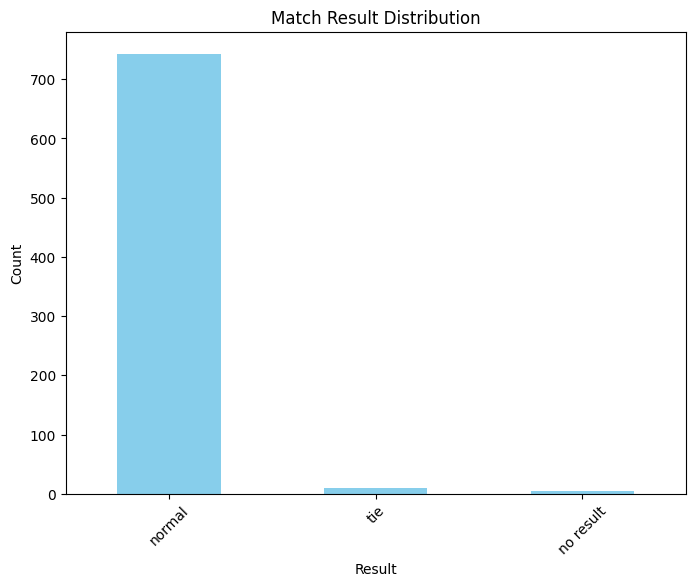

In [17]:
# Match results distribution
plt.figure(figsize=(8, 6))
matches_df['result'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Match Result Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


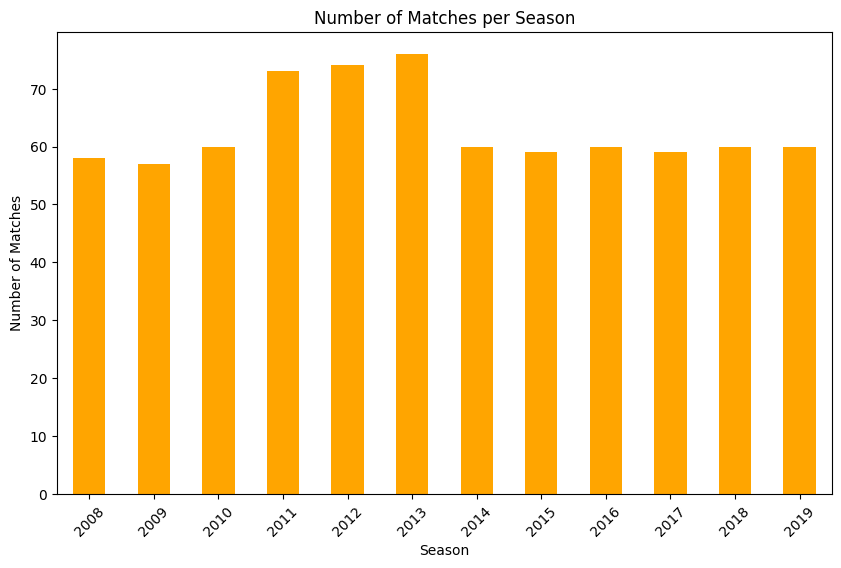

In [18]:
# Matches distribution by season
plt.figure(figsize=(10, 6))
matches_df['season'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

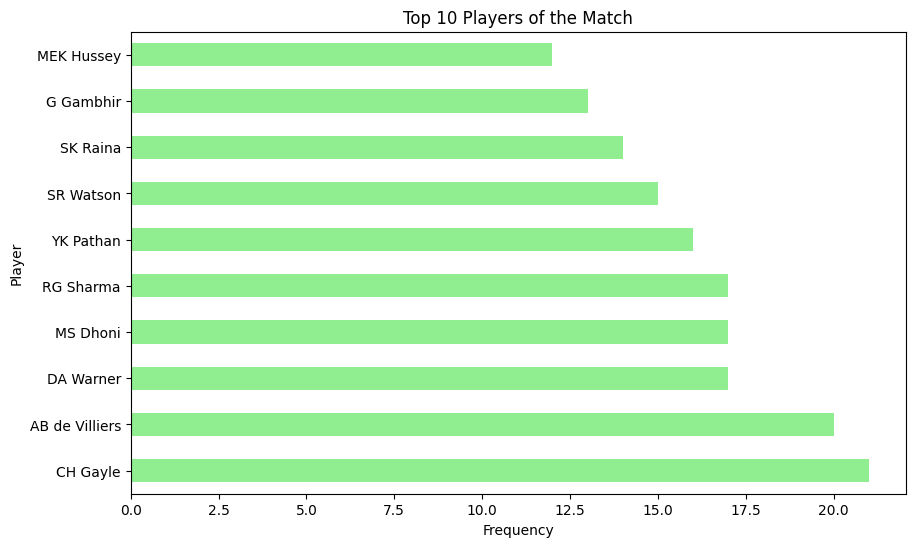

In [19]:
# Most frequent players of the match
top_players = matches_df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_players.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Players of the Match')
plt.xlabel('Frequency')
plt.ylabel('Player')
plt.show()


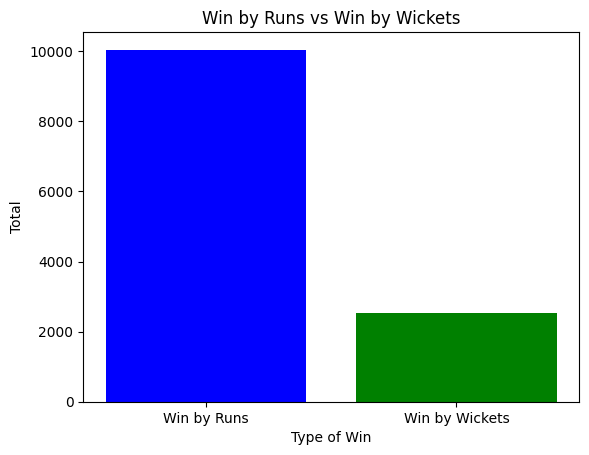

In [20]:
# Win by runs vs win by wickets
win_by_runs = matches_df['win_by_runs'].sum()
win_by_wickets = matches_df['win_by_wickets'].sum()

data = {'Win by Runs': win_by_runs, 'Win by Wickets': win_by_wickets}
plt.bar(data.keys(), data.values(), color=['blue', 'green'])
plt.title('Win by Runs vs Win by Wickets')
plt.xlabel('Type of Win')
plt.ylabel('Total')
plt.show()


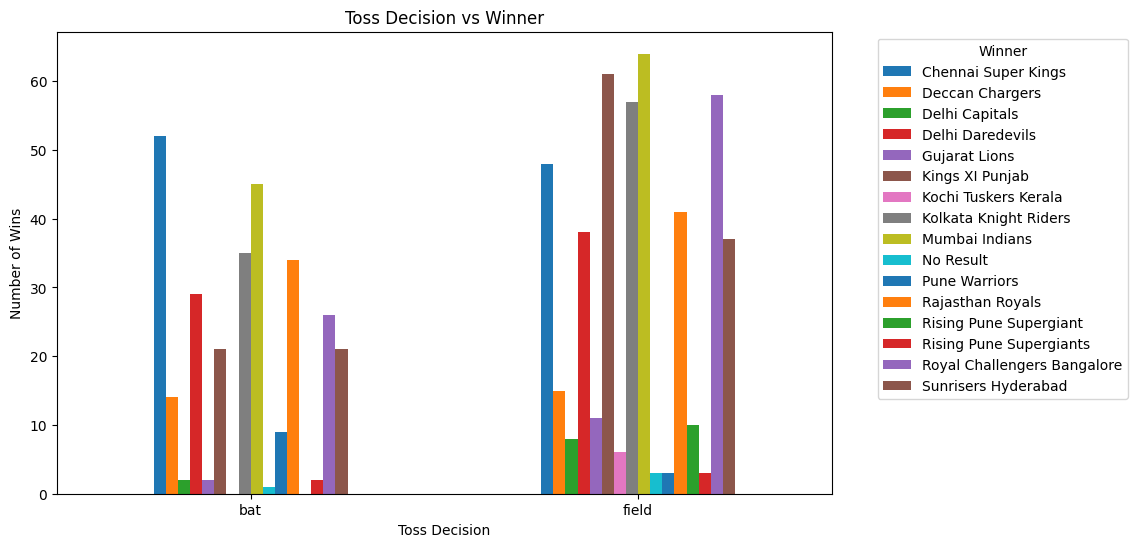

In [25]:
# Toss decision vs winner with separate bars for each toss decision
toss_decision_vs_winner = matches_df.groupby('toss_decision')['winner'].value_counts().unstack().fillna(0)
toss_decision_vs_winner.plot(kind='bar', figsize=(10, 6))
plt.title('Toss Decision vs Winner')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.xticks(rotation=0)
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




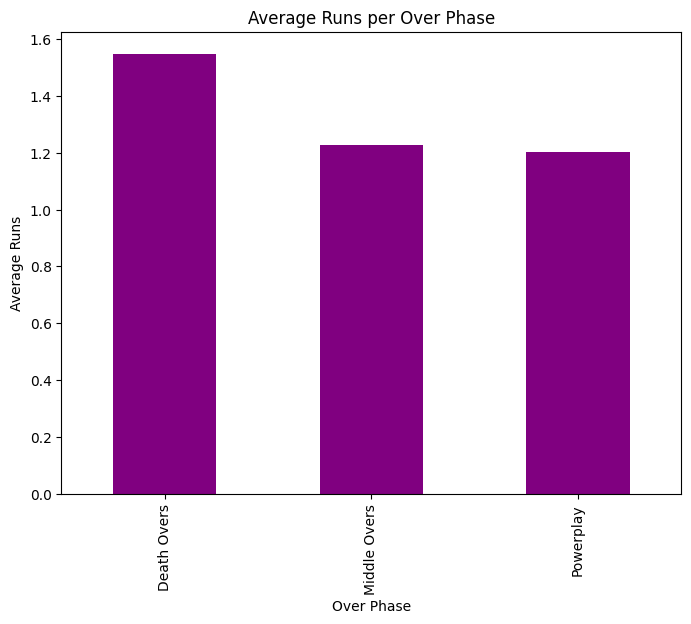

In [26]:
# Create a column for over phases: Powerplay, Middle, and Death
def get_over_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

deliveries_df['over_phase'] = deliveries_df['over'].apply(get_over_phase)

# Runs per over phase
runs_per_over_phase = deliveries_df.groupby('over_phase')['total_runs'].mean()

# Plot
plt.figure(figsize=(8, 6))
runs_per_over_phase.plot(kind='bar', color='purple')
plt.title('Average Runs per Over Phase')
plt.xlabel('Over Phase')
plt.ylabel('Average Runs')
plt.show()


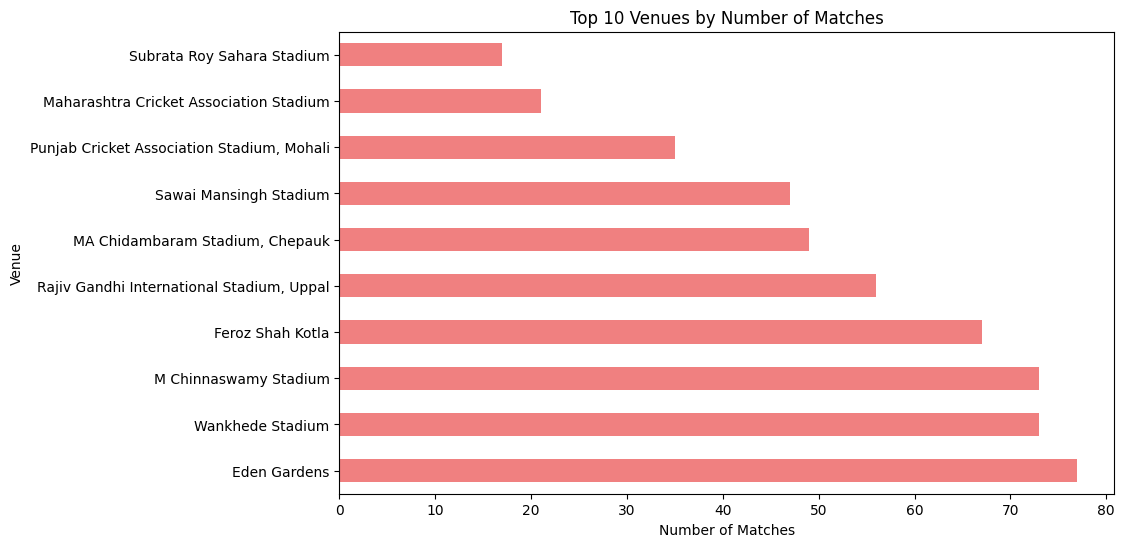

In [27]:
# Matches distribution by venue
top_venues = matches_df['venue'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_venues.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()


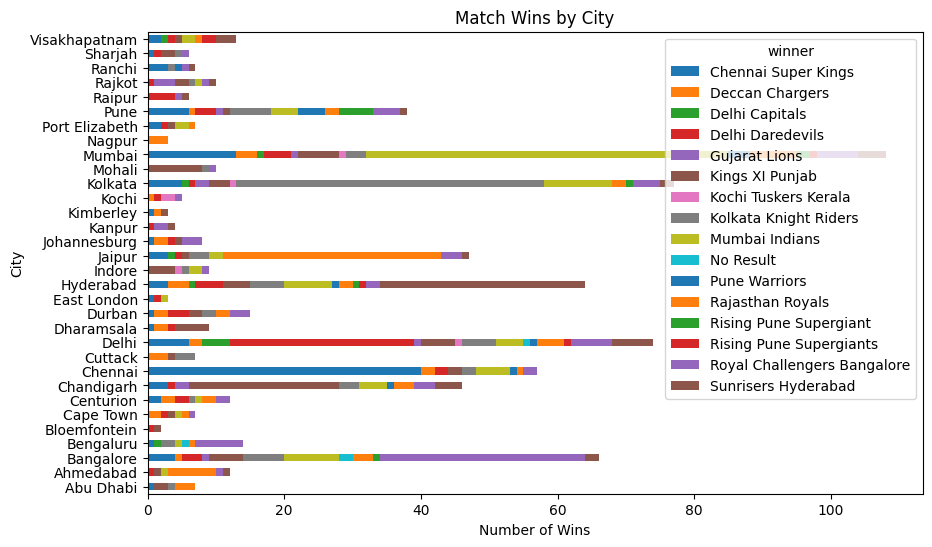

In [28]:
# Match wins by city
city_wins = matches_df.groupby('city')['winner'].value_counts().unstack().fillna(0)
city_wins.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Match Wins by City')
plt.xlabel('Number of Wins')
plt.ylabel('City')
plt.show()


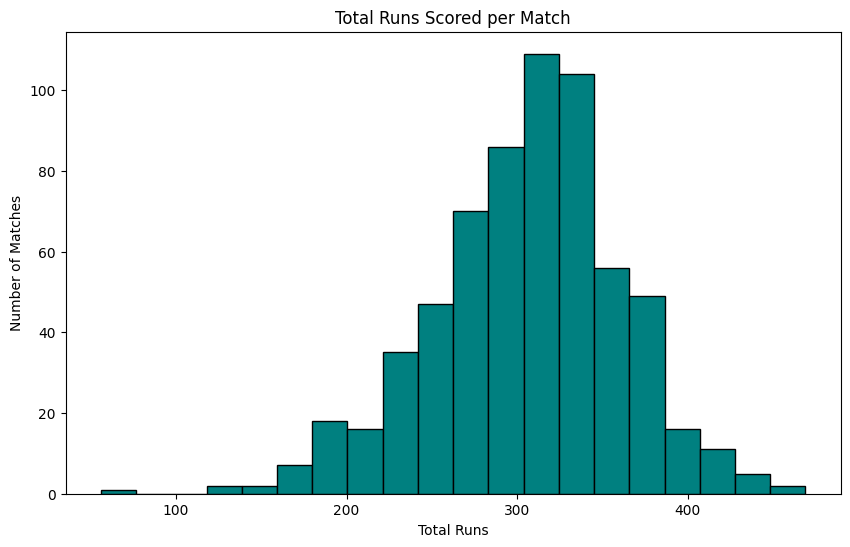

In [29]:
# Total runs scored per match (sum of total_runs per match)
total_runs_per_match = deliveries_df.groupby('match_id')['total_runs'].sum()
plt.figure(figsize=(10, 6))
total_runs_per_match.plot(kind='hist', bins=20, color='teal', edgecolor='black')
plt.title('Total Runs Scored per Match')
plt.xlabel('Total Runs')
plt.ylabel('Number of Matches')
plt.show()


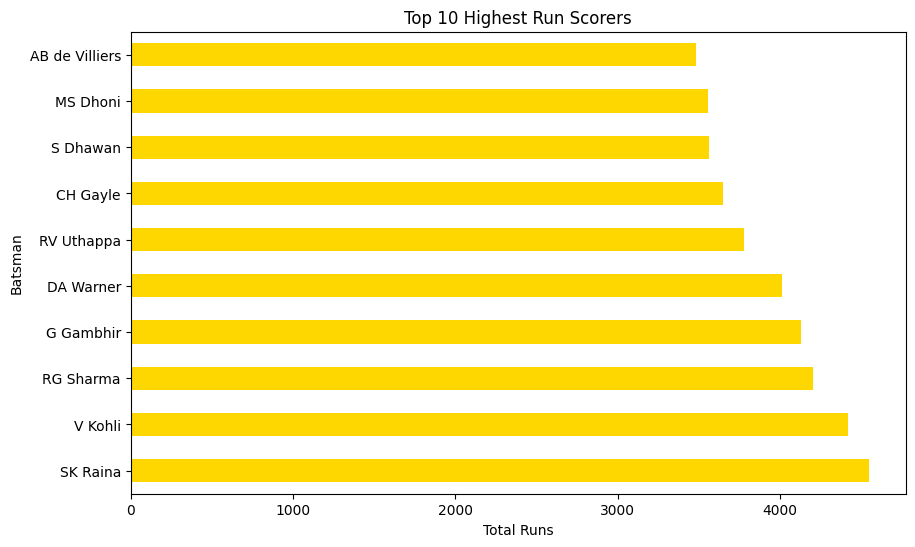

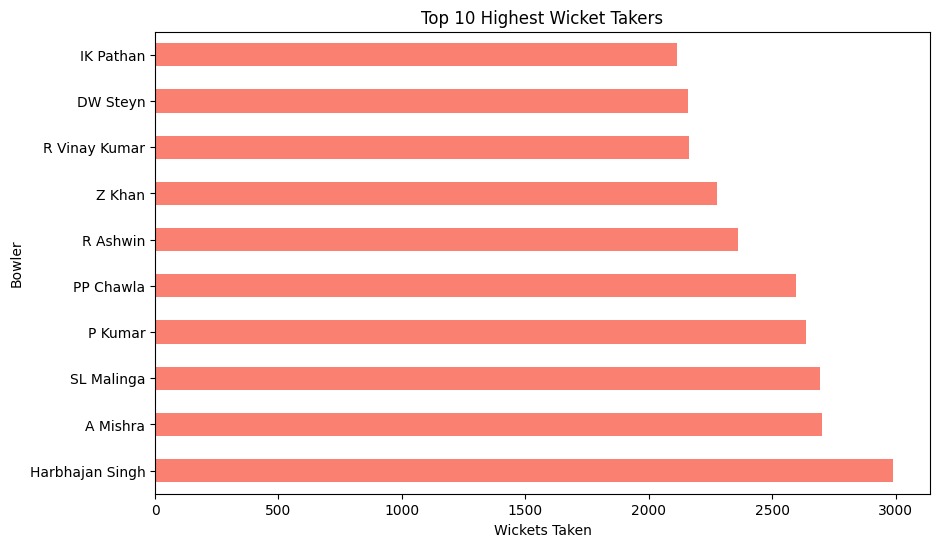

In [30]:
# Highest run scorers (batsman_runs)
top_run_scorers = deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_run_scorers.plot(kind='barh', color='gold')
plt.title('Top 10 Highest Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

# Highest wicket takers (assuming bowler is the one taking wickets)
wicket_takers = deliveries_df[deliveries_df['player_dismissed'].notnull()].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
wicket_takers.plot(kind='barh', color='salmon')
plt.title('Top 10 Highest Wicket Takers')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()
